## Requirements

In [ ]:
!pip install pandas
!conda install -c conda-forge osmnx

## Fixing the data. 

In [1]:
import numpy as np
import pandas as pd

traffic_counts = pd.read_csv('~/work/data/Traffic_Studies__Vehicle_Volume_Reports__BETA_.csv')
location_data = pd.read_csv('~/work/data/Traffic_Studies__Locations__BETA_.csv')

In [2]:
print(location_data.dtypes)
len(location_data[location_data.SITE_CODE == "D1JDC"])

GLOBALID                            object
DATA_FILE                           object
SITE_CODE                           object
START_DATE                          object
COMMENT_FIELD2                      object
COMMENT_FIELD1                      object
COMMENT_FIELD4                      object
COMMENT_FIELD3                      object
LOCATION                            object
Zip Codes                           object
Single Member Council Districts    float64
dtype: object


8

Extracting the `LOCATION` into floating point values `latitude` and `longitude`.

In [3]:
location_data['latitude'] = location_data['LOCATION'].apply(lambda row: eval(row)[0])
location_data['longitude'] = location_data['LOCATION'].apply(lambda row: eval(row)[1])

location_data = location_data.drop(columns=['LOCATION'])

location_data.head()

print(traffic_counts.dtypes)
traffic_counts.head()

TRAFFIC_STUDY_COUNT_ID    object
ROW_ID                    object
DATA_FILE                 object
SITE_CODE                 object
DATETIME                  object
YEAR                      object
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
TIME                      object
CHANNEL                   object
COUNT_CHANNEL              int64
COUNT_TOTAL                int64
dtype: object


,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,DATETIME,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL
0,"88,852",33f341612b199825adff17c5e9681e8bf86be3b0,2ndStE1400BlkWB.rdf,G8JN,04/25/2017 05:15:00 PM,"2,017",4,25,1,17:15,WB,22,22
1,"14,297",c87651b8fc232657f51544c0265bb71edb645f56,McCulloughSt2500BlkBD.rdf,G23RLZ,04/29/2016 12:00:00 PM,"2,016",4,29,4,12:00,EB,1,2
2,"77,384",18adda49b6e3bb477c43b2f3680bded2a7562634,CampMabryDrwy3044SB.rdf,G14CS,10/01/2015 10:15:00 AM,"2,015",10,1,3,10:15,SB,1,1
3,"29,525",98741d8ab066e9feca723bd8720867aa52f5018e,DessauRd10101BlkBD.rdf,D2JMA,03/22/2016 09:30:00 AM,"2,016",3,22,1,09:30,NB,112,162
4,"78,443",2b804108c6c9baab387e9b79c58498bf71e1cb60,CedroTrl5200blkBD.rdf,G20JDC,10/13/2015 01:30:00 PM,"2,015",10,13,1,13:30,EB,24,50


Now we have to extract the date time into a usable format. 

In [4]:
traffic_counts['date_time'] = pd.to_datetime(traffic_counts['DATETIME'])
traffic_counts['time'] = pd.to_datetime(traffic_counts['TIME'])
traffic_counts = traffic_counts.drop(columns=['TIME'])
traffic_counts = traffic_counts.drop(columns=['DATETIME'])

traffic_counts.head()

,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL,date_time,time
0,"88,852",33f341612b199825adff17c5e9681e8bf86be3b0,2ndStE1400BlkWB.rdf,G8JN,"2,017",4,25,1,WB,22,22,2017-04-25 17:15:00,2019-04-29 17:15:00
1,"14,297",c87651b8fc232657f51544c0265bb71edb645f56,McCulloughSt2500BlkBD.rdf,G23RLZ,"2,016",4,29,4,EB,1,2,2016-04-29 12:00:00,2019-04-29 12:00:00
2,"77,384",18adda49b6e3bb477c43b2f3680bded2a7562634,CampMabryDrwy3044SB.rdf,G14CS,"2,015",10,1,3,SB,1,1,2015-10-01 10:15:00,2019-04-29 10:15:00
3,"29,525",98741d8ab066e9feca723bd8720867aa52f5018e,DessauRd10101BlkBD.rdf,D2JMA,"2,016",3,22,1,NB,112,162,2016-03-22 09:30:00,2019-04-29 09:30:00
4,"78,443",2b804108c6c9baab387e9b79c58498bf71e1cb60,CedroTrl5200blkBD.rdf,G20JDC,"2,015",10,13,1,EB,24,50,2015-10-13 13:30:00,2019-04-29 13:30:00


In [ ]:
location_data[location_data['SITE_CODE'].isin(['G8JN'])].head()

In [ ]:
traffic_counts[traffic_counts['SITE_CODE'].isin(['G8JN'])].head()

Trying to determine what the duplicate row entries look like. 

In [7]:
merge = pd.merge(traffic_counts, location_data, how='inner', on=['DATA_FILE'])
print(merge.shape)
print(traffic_counts.shape)
merge[merge['ROW_ID'] == 'f8661d1e33f76d71e6d3a8fb1b619b3426c24bd0'][['ROW_ID', 'DATA_FILE', 'date_time', 'COUNT_TOTAL','latitude', 'longitude' ]]

(84115, 24)
(123870, 13)


,ROW_ID,DATA_FILE,date_time,COUNT_TOTAL,latitude,longitude
4032,f8661d1e33f76d71e6d3a8fb1b619b3426c24bd0,LakewoodDr7200BlkBD.rdf,2016-09-27 17:45:00,57,30.373431,-97.789000
4033,f8661d1e33f76d71e6d3a8fb1b619b3426c24bd0,LakewoodDr7200BlkBD.rdf,2016-09-27 17:45:00,57,30.373417,-97.788997


I think it safe to assume that duplicate columns are identical when looking at the `COUNT_TOTAL`

In [8]:
merge_no_dups = merge.drop_duplicates('ROW_ID')
print(merge_no_dups.shape)
print(merge_no_dups.dtypes)
merge_no_dups['ROW_ID'].is_unique

(80947, 24)
TRAFFIC_STUDY_COUNT_ID                     object
ROW_ID                                     object
DATA_FILE                                  object
SITE_CODE_x                                object
YEAR                                       object
MONTH                                       int64
DAY_OF_MONTH                                int64
DAY_OF_WEEK                                 int64
CHANNEL                                    object
COUNT_CHANNEL                               int64
COUNT_TOTAL                                 int64
date_time                          datetime64[ns]
time                               datetime64[ns]
GLOBALID                                   object
SITE_CODE_y                                object
START_DATE                                 object
COMMENT_FIELD2                             object
COMMENT_FIELD1                             object
COMMENT_FIELD4                             object
COMMENT_FIELD3                        

True

### Traffic Data
Lets look at how the traffic data looks like throughout a day at a single intersection.

(array([737178.   , 737178.125, 737178.25 , 737178.375, 737178.5  ,
        737178.625, 737178.75 , 737178.875, 737179.   ]),
 <a list of 9 Text xticklabel objects>)

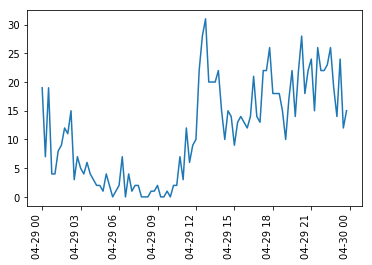

In [25]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

secondst_data = merge_no_dups[merge_no_dups['DATA_FILE'] == '2ndStE1400BlkWB.rdf'].sort_values(by='time')



plt.plot(secondst_data['time'], secondst_data['COUNT_TOTAL'])
plt.gcf().autofmt_xdate()
plt.xticks(rotation='vertical')

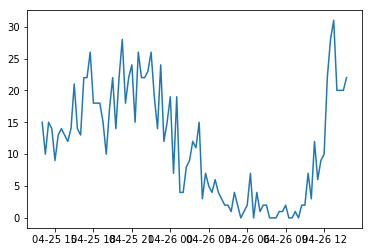

In [17]:
secondst_data_dt = merge_no_dups[merge_no_dups['DATA_FILE'] == '2ndStE1400BlkWB.rdf'].sort_values(by='date_time')
plt.plot(secondst_data_dt['date_time'], secondst_data_dt['COUNT_TOTAL'])

## Maps

In [ ]:
import osmnx as ox

location = "2101 Rio Grande Street, Austin, TX 78705"
G = ox.graph_from_address(location)

In [ ]:
fig, ax = ox.plot_graph(G, show=False, close=False)